<a href="https://colab.research.google.com/github/jacyuu/-112/blob/main/Python%E4%BD%9C%E6%A5%AD_%E7%AC%AC2%E7%B5%84_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

411352210賴沛儀411352181鄭光詃411352155謝芮妮411352387張瀞予

1.請將「imdb_top_1000.xlsx」檔案存到你的Google雲端硬碟中，並分享檔案權限的方式讀取檔案中『Data』工作表中的資料，並命名為imdb1000資料集。(10%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
imdb1000 = pd.read_excel('drive/MyDrive/lulu/imdb_top_1000.xlsx')
print(imdb1000)

                 Series_Title  Released_Year Certificate  Runtime  \
0    The Shawshank Redemption           1994           A      142   
1               The Godfather           1972           A      175   
2             The Dark Knight           2008          UA      152   
3      The Godfather: Part II           1974           A      202   
4                12 Angry Men           1957           U       96   
..                        ...            ...         ...      ...   
995    Breakfast at Tiffany's           1961           A      115   
996                     Giant           1956           G      201   
997     From Here to Eternity           1953      Passed      118   
998                  Lifeboat           1944         NaN       97   
999              The 39 Steps           1935         NaN       86   

     IMDB_Rating  Meta_score  No_of_Votes        Gross  
0            9.3        80.0      2343110   28,341,469  
1            9.2       100.0      1620367  134,966,411  


2.請將imdb1000中欄位名稱為「Series_Title」改成「電影片名」；「Runtime」改為「影片長度」並重新存回imdb1000 (5%)。

In [ ]:
imdb1000.rename(columns={'Series_Title': '電影片名', 'Runtime': '影片長度'}, inplace=True)
print(imdb1000.head(5))

                       電影片名  Released_Year Certificate  影片長度  IMDB_Rating  \
0  The Shawshank Redemption           1994           A   142          9.3   
1             The Godfather           1972           A   175          9.2   
2           The Dark Knight           2008          UA   152          9.0   
3    The Godfather: Part II           1974           A   202          9.0   
4              12 Angry Men           1957           U    96          9.0   

   Meta_score  No_of_Votes        Gross  
0        80.0      2343110   28,341,469  
1       100.0      1620367  134,966,411  
2        84.0      2303232  534,858,444  
3        90.0      1129952   57,300,000  
4        96.0       689845    4,360,000  


3.請用info指令檢視資料集中變數是否符合「imdb_top_1000.xlsx」檔案中『變數定義』所認定之定義；若不是，請將該變數轉型成適當的資料型別(10%)。

In [ ]:
print(imdb1000.info())
#Gross是票房數，應為int。其他的資料類別是對的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   電影片名           1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   影片長度           1000 non-null   int64  
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   No_of_Votes    1000 non-null   int64  
 7   Gross          831 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
None


In [ ]:
imdb1000['Gross'] = imdb1000['Gross'].replace({',': ''}, regex=True)
imdb1000['Gross'] = pd.to_numeric(imdb1000['Gross'], errors='coerce')

print(imdb1000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   電影片名           1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   影片長度           1000 non-null   int64  
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   No_of_Votes    1000 non-null   int64  
 7   Gross          831 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB
None


4.請將imdb1000中有遺失值的列刪除，另存成imdb_drop(5%)。


In [ ]:
imdb_drop = imdb1000.dropna()
print(imdb_drop)
#imdb_1000原有1000筆資料，此資料表imdb_drop擁有缺失值的資料有750筆

                         電影片名  Released_Year Certificate  影片長度  IMDB_Rating  \
0    The Shawshank Redemption           1994           A   142          9.3   
1               The Godfather           1972           A   175          9.2   
2             The Dark Knight           2008          UA   152          9.0   
3      The Godfather: Part II           1974           A   202          9.0   
4                12 Angry Men           1957           U    96          9.0   
..                        ...            ...         ...   ...          ...   
990              Giù la testa           1971          PG   157          7.6   
991            Kelly's Heroes           1970          GP   144          7.6   
992           The Jungle Book           1967           U    78          7.6   
994        A Hard Day's Night           1964           U    87          7.6   
997     From Here to Eternity           1953      Passed   118          7.6   

     Meta_score  No_of_Votes        Gross  
0      

5.請用「if…elif…elif…else…判斷式」將imdb_drop中「IMDB_Rating」重新定義一個變數為『評等』存回imdb_drop這個資料集內，變數定義如下：(10%)
A   >= 9.0
B   < 9.0 and >= 8.5
C   <8.5 and >= 8.0
D   <8.0


In [ ]:
imdb_drop['評等'] = ''
for index, row in imdb_drop.iterrows():
  if row['IMDB_Rating'] >= 9.0:
    imdb_drop.at[index, '評等'] = 'A'
  elif 8.5 <= row['IMDB_Rating'] < 9.0:
    imdb_drop.at[index, '評等'] = 'B'
  elif 8.0 <= row['IMDB_Rating'] < 8.5:
    imdb_drop.at[index, '評等'] = 'C'
  else:
    imdb_drop.at[index, '評等'] = 'D'

print(imdb_drop[['IMDB_Rating', '評等']].head())

   IMDB_Rating 評等
0          9.3  A
1          9.2  A
2          9.0  A
3          9.0  A
4          9.0  A


<ipython-input-9-0782929ac73c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_drop['評等'] = ''


6.請將imdb_drop中的「電影片名」定義成index並重新存回imdb_drop (5%)。

In [ ]:
imdb_drop = imdb_drop.set_index('電影片名')
print(imdb_drop.head())

                          Released_Year Certificate  影片長度  IMDB_Rating  \
電影片名                                                                     
The Shawshank Redemption           1994           A   142          9.3   
The Godfather                      1972           A   175          9.2   
The Dark Knight                    2008          UA   152          9.0   
The Godfather: Part II             1974           A   202          9.0   
12 Angry Men                       1957           U    96          9.0   

                          Meta_score  No_of_Votes        Gross 評等  
電影片名                                                               
The Shawshank Redemption        80.0      2343110   28341469.0  A  
The Godfather                  100.0      1620367  134966411.0  A  
The Dark Knight                 84.0      2303232  534858444.0  A  
The Godfather: Part II          90.0      1129952   57300000.0  A  
12 Angry Men                    96.0       689845    4360000.0  A  


7.請將imdb_drop中「影片長度」、「IMDB_Rating」、「Meta_score」、「No_of_Votes」、「Gross」5個欄位資料另存為imdb_numeric資料集(5%)。

In [ ]:
# 直接選擇指定的欄位並保存
imdb_numeric = imdb_drop[['影片長度', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
print(imdb_numeric)

                          影片長度  IMDB_Rating  Meta_score  No_of_Votes  \
電影片名                                                                   
The Shawshank Redemption   142          9.3        80.0      2343110   
The Godfather              175          9.2       100.0      1620367   
The Dark Knight            152          9.0        84.0      2303232   
The Godfather: Part II     202          9.0        90.0      1129952   
12 Angry Men                96          9.0        96.0       689845   
...                        ...          ...         ...          ...   
Giù la testa               157          7.6        77.0        30144   
Kelly's Heroes             144          7.6        50.0        45338   
The Jungle Book             78          7.6        65.0       166409   
A Hard Day's Night          87          7.6        96.0        40351   
From Here to Eternity      118          7.6        85.0        43374   

                                Gross  
電影片名                   

8.計算imdb_numeric所有欄位的平均數、標準差、最大值、最小值，以及變數間的共變異數及相關係數矩陣(10%)。

In [ ]:
#平均數
mean_values = imdb_numeric.mean()
#標準差
std_values = imdb_numeric.std()
#最大值
max_values = imdb_numeric.max()
#最小值
min_values = imdb_numeric.min()
#共變異數矩陣
covariance_matrix = imdb_numeric.cov()
#相關係數矩陣
correlation_matrix = imdb_numeric.corr()

print("平均數:")
print(mean_values)
print("\n標準差:")
print(std_values)
print("\n最大值:")
print(max_values)
print("\n最小值:")
print(min_values)
print("\n共變異數矩陣:")
print(covariance_matrix)
print("\n相關係數矩陣:")
print(correlation_matrix)

平均數:
影片長度           1.237157e+02
IMDB_Rating    7.937115e+00
Meta_score     7.715826e+01
No_of_Votes    3.561348e+05
Gross          7.851359e+07
dtype: float64

標準差:
影片長度           2.588754e+01
IMDB_Rating    2.932778e-01
Meta_score     1.240114e+01
No_of_Votes    3.539011e+05
Gross          1.149780e+08
dtype: float64

最大值:
影片長度                 238.0
IMDB_Rating            9.3
Meta_score           100.0
No_of_Votes      2343110.0
Gross          936662225.0
dtype: float64

最小值:
影片長度              72.0
IMDB_Rating        7.6
Meta_score        28.0
No_of_Votes    25229.0
Gross           1305.0
dtype: float64

共變異數矩陣:
                     影片長度   IMDB_Rating    Meta_score   No_of_Votes  \
影片長度         6.701645e+02  1.960497e+00 -1.835726e+00  1.957448e+06   
IMDB_Rating  1.960497e+00  8.601186e-02  1.021607e+00  6.467677e+04   
Meta_score  -1.835726e+00  1.021607e+00  1.537884e+02  1.305417e+05   
No_of_Votes  1.957448e+06  6.467677e+04  1.305417e+05  1.252460e+11   
Gross        5.026262e+

9.請將imdb_drop中「評等」另存成imdb_rate的資料集(5%)。

In [ ]:
imdb_rate = imdb_drop[['評等']]
print(imdb_rate)

                         評等
電影片名                       
The Shawshank Redemption  A
The Godfather             A
The Dark Knight           A
The Godfather: Part II    A
12 Angry Men              A
...                      ..
Giù la testa              D
Kelly's Heroes            D
The Jungle Book           D
A Hard Day's Night        D
From Here to Eternity     D

[714 rows x 1 columns]


10.請將imdb_rate及imdb_numeric兩個資料集進行欄位合併成imdb_merge(5%)。

In [ ]:
imdb_merge = imdb_rate.join(imdb_numeric)
print(imdb_merge.head())

                         評等  影片長度  IMDB_Rating  Meta_score  No_of_Votes  \
電影片名                                                                      
The Shawshank Redemption  A   142          9.3        80.0      2343110   
The Godfather             A   175          9.2       100.0      1620367   
The Dark Knight           A   152          9.0        84.0      2303232   
The Godfather: Part II    A   202          9.0        90.0      1129952   
12 Angry Men              A    96          9.0        96.0       689845   

                                Gross  
電影片名                                   
The Shawshank Redemption   28341469.0  
The Godfather             134966411.0  
The Dark Knight           534858444.0  
The Godfather: Part II     57300000.0  
12 Angry Men                4360000.0  


11.以imdb_merge中「評等」進行資料分組，分別計算其「影片長度」、「IMDB_Rating」、「Meta_score」、「No_of_Votes」、「Gross」5個變數的平均數、個數(10%)。

In [ ]:
grouped_stats = imdb_merge.groupby('評等').agg({
    '影片長度': ['mean', 'count'],
    'IMDB_Rating': ['mean', 'count'],
    'Meta_score': ['mean', 'count'],
    'No_of_Votes': ['mean', 'count'],
    'Gross': ['mean', 'count']
})

grouped_stats.columns = ['影片長度_平均', '影片長度_個數',
              'IMDB_Rating_平均', 'IMDB_Rating_個數',
              'Meta_score_平均', 'Meta_score_個數',
              'No_of_Votes_平均', 'No_of_Votes_個數',
              'Gross_平均', 'Gross_個數']

print(grouped_stats)

       影片長度_平均  影片長度_個數  IMDB_Rating_平均  IMDB_Rating_個數  Meta_score_平均  \
評等                                                                       
A   153.400000        5        9.100000               5      90.000000   
B   138.279070       43        8.611628              43      81.558140   
C   128.330709      254        8.124016             254      79.972441   
D   118.990291      412        7.737379             412      74.808252   

    Meta_score_個數  No_of_Votes_平均  No_of_Votes_個數      Gross_平均  Gross_個數  
評等                                                                         
A               5    1.617301e+06               5  1.519653e+08         5  
B              43    1.039062e+06              43  1.269103e+08        43  
C             254    4.160962e+05             254  8.114404e+07       254  
D             412    2.325866e+05             412  7.094939e+07       412  


12.請以imdb_drop中「Certificate」項目的次數分配表繪製圓餅圖，並命名該圖表的title為『認證項目圓餅圖』(10%)。


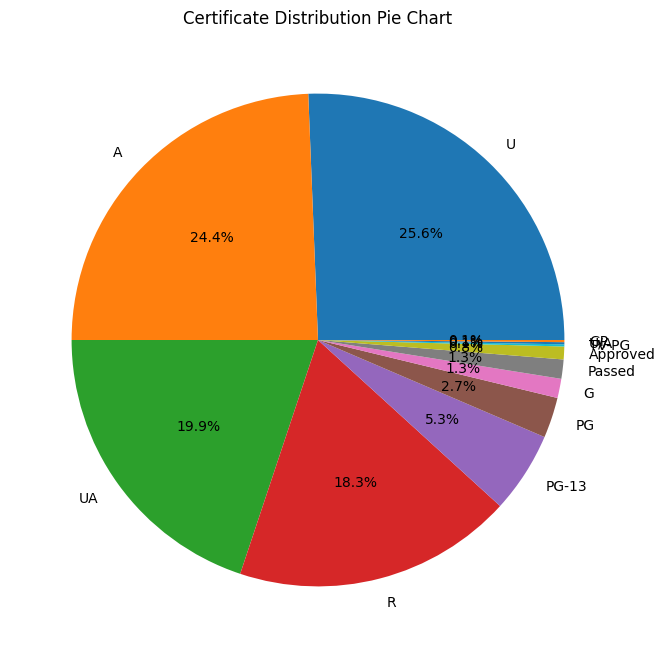

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font

certificate_counts = imdb_drop['Certificate'].value_counts()

plt.figure(figsize=(8, 8))
certificate_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Certificate Distribution Pie Chart')
plt.ylabel('')
plt.show()

13.請篩選imdb_drop中「Certificate」為U的項目，且欄位保留「Certificate」及「Meta_Score」2個變數，另存成imdb_U資料集(5%)。

In [ ]:
imdb_U = imdb_drop.loc[imdb_drop['Certificate'] == 'U', ['Certificate', 'Meta_score']]

print(imdb_U.head())

                                                  Certificate  Meta_score
電影片名                                                                     
12 Angry Men                                                U        96.0
The Lord of the Rings: The Return of the King               U        94.0
The Lord of the Rings: The Fellowship of the Ring           U        92.0
Sen to Chihiro no kamikakushi                               U        96.0
La vita è bella                                             U        59.0


14.請繪製imdb_U中「Meta_Score」變數的莖葉圖(5%)。

15.請繪製imdb_drop中「No_of_Votes」的盒鬚圖（以「評等」進行分組）(10%)。


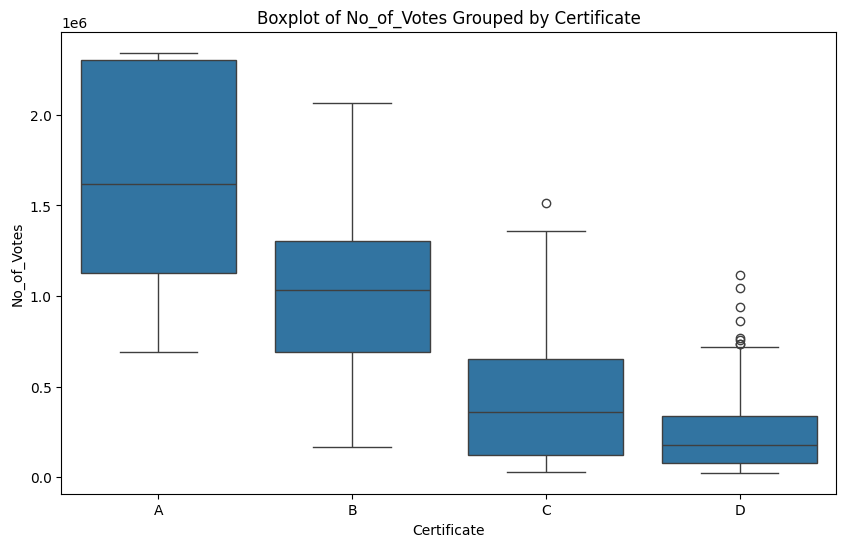

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='評等', y='No_of_Votes', data=imdb_drop)
plt.title('Boxplot of No_of_Votes Grouped by Certificate')
plt.xlabel('Certificate')
plt.ylabel('No_of_Votes')
plt.show()

16.請分別讀入以下兩個檔案，並分別命名為Dat1及Dat2，再將這兩個檔案上下合併(10%)。